In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import math
from matplotlib.colors import ListedColormap

# Problem 1

In [55]:
#defining cellular automona rules for rule 122

neighrule = {(0,0,0):0, (0,0,1):1, (0,1,0):0, (0,1,1):1, (1,0,0):1, (1,0,1):1, (1,1,0):1, (1,1,1):0}

In [56]:
#setup parameters to run cellular autonoma
initialcond = [1,0,0,0,0,0,0,0,1,1] # for testing
L = 8 #how long is the system?


In [57]:
# Takes a configuration and returns the corresponding integer
def config2int(config):
    return int(''.join(map(str, config)),2) # maps the config->strings, joins them, and then converts to int from binary

# Takes an integer and converts it to a configuration (list of cell states)
def int2config(x):
    return [1 if x & 2**i > 0 else 0 for i in range(L - 1, -1, -1)]

def update(config):
    nextconfig = [0]*L
    for x in range(L):
        nextconfig[x] = neighrule[(config[(x - 1) % L],config[x],config[(x + 1) % L])]
    return nextconfig

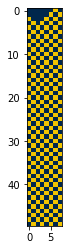

In [58]:
# Run the model for a few steps and plot
steps = 50
output = np.zeros([steps,L])
output[0,:] = int2config(2)
for i in range(1,steps):
    output[i,:] = update(output[i-1,:])
plt.cla()
cmap = ListedColormap([(0,39/255,76/255), (241/255,196/255,0)]) # for fun use maize & blue colors
plt.imshow(output, cmap = cmap)

Text(0.5, 1.0, 'Phase Space for Rule 122 for L=8')

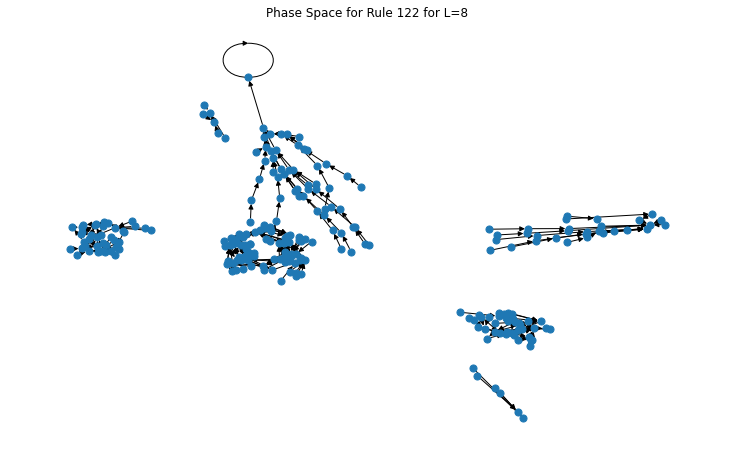

In [62]:
state_map = {}
for x in range(256):
    config = int2config(x)
    next_config = update(config)
    state_map[x] = config2int(next_config)

# showing the entire phase space configuration
G = nx.DiGraph()
for state, next_state in state_map.items():
    G.add_edge(state, next_state)

attractors = list(nx.simple_cycles(G))

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=50, with_labels=False, arrows=True)
plt.title(f"Phase Space for Rule 122 for L={L}")

In [60]:
g = nx.DiGraph() # Make an empty graph that will be the phase space

for x in range(2**L):
    g.add_edge(x, config2int(update(int2config(x))))
    
print(g)

DiGraph with 256 nodes and 256 edges


8


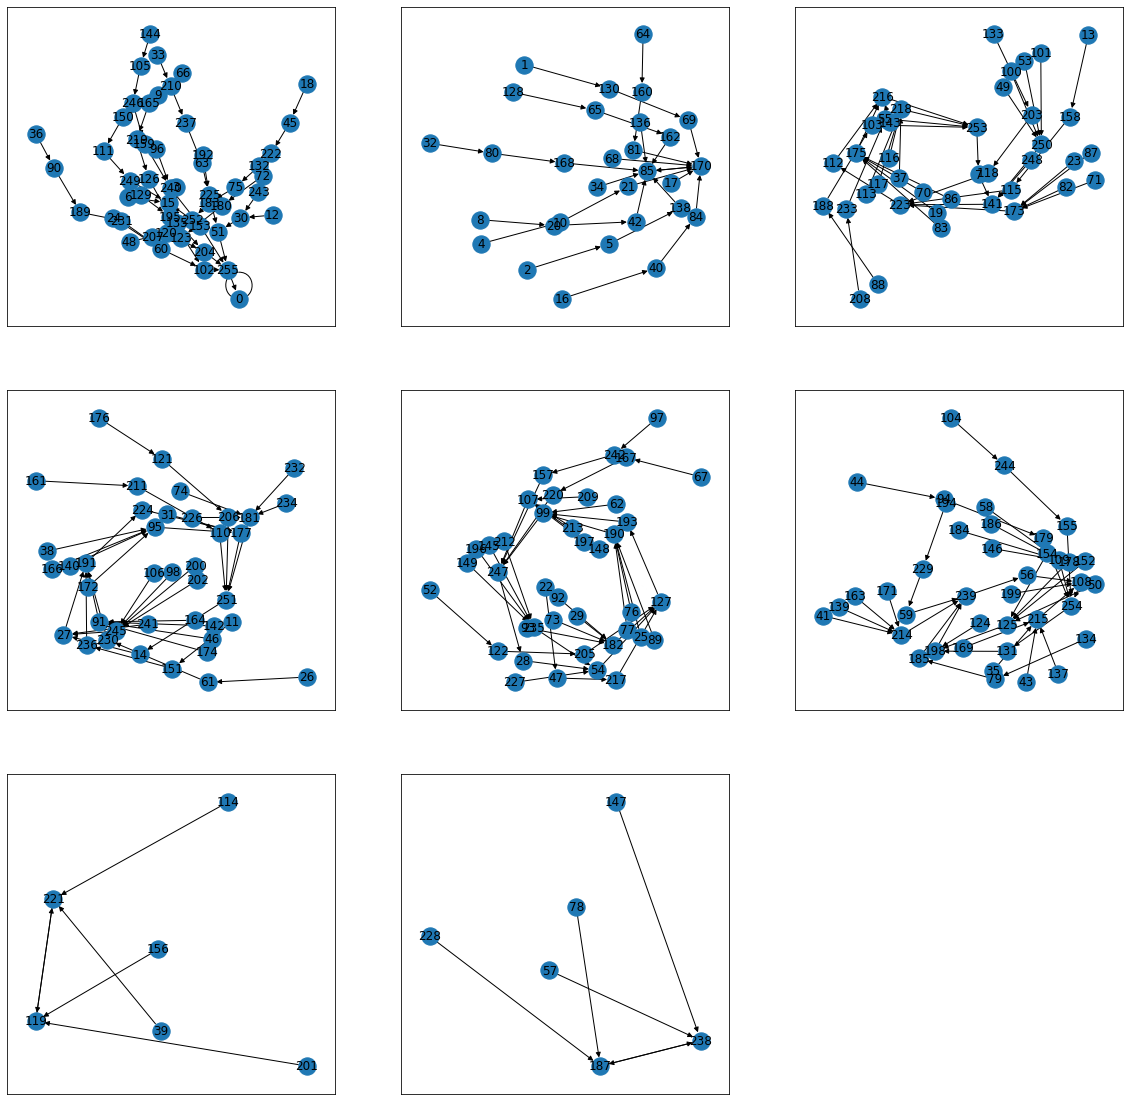

In [61]:
# Plot each connected component of the phase space separately
ccs = [cc for cc in nx.connected_components(g.to_undirected())]
n = len(ccs)
print(n)
w = math.ceil(math.sqrt(n))
h = math.ceil(n / w)

#plt.figure(1, figsize = (12,12))
plt.figure(1, figsize = (20,20))
for i in range(n):
    plt.subplot(h, w, i + 1)
    nx.draw_networkx(nx.subgraph(g, ccs[i]), with_labels = True)

plt.show()
# Suplots are sometimes too packed, so also useful to just draw a few individually
#nx.draw_networkx(nx.subgraph(g, ccs[1]), with_labels = True)


In [33]:
print("Undirected graph diameter: ", max([nx.diameter(nx.subgraph(g, ccs[j]).to_undirected()) for j in range(n)])   )

print("Largest directed shortest path:", max([max(j.values()) for (i,j) in nx.shortest_path_length(g)]) )

Undirected graph diameter:  12
Largest directed shortest path: 8
